### Importações e obtenção dos dados

In [1]:
import pandas as pd
import numpy as np
import os
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
directory = '..\\data\\processed'
parquet_file = [file for file in os.listdir(directory) if file.endswith('.parquet')][0]

In [3]:
parquet_dir = os.path.join(directory, parquet_file)
print(parquet_dir)

..\data\processed\concatenated_dfs.parquet


In [4]:
df = pd.read_parquet(parquet_dir)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                280900 non-null  object 
 12  winery                 280901 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


### Análise com TextBlob

In [6]:
df['polarity_blob'] = df.description.apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity_blob'] = df.description.apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [7]:
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,polarity_blob,subjectivity_blob
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.133333,0.733333
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.220000,0.460000


##### Visualizando a distribuição de 'polarity"

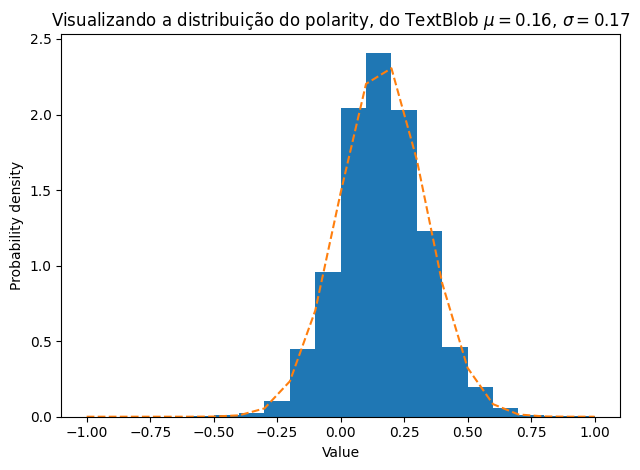

In [8]:
fig, ax = plt.subplots()

# example data
polarity = df.polarity_blob.values
mean = polarity.mean()  # mean of distribution
std = np.std(polarity)  # standard deviation of distribution

n_bins = 20

# the histogram of the data
n, bins, patches = ax.hist(polarity, n_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * (bins - mean))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Visualizando a distribuição do polarity, do TextBlob '
             fr'$\mu={mean:.2f}$, $\sigma={std:.2f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


##### Verificando novamente a distribuição dos pontos

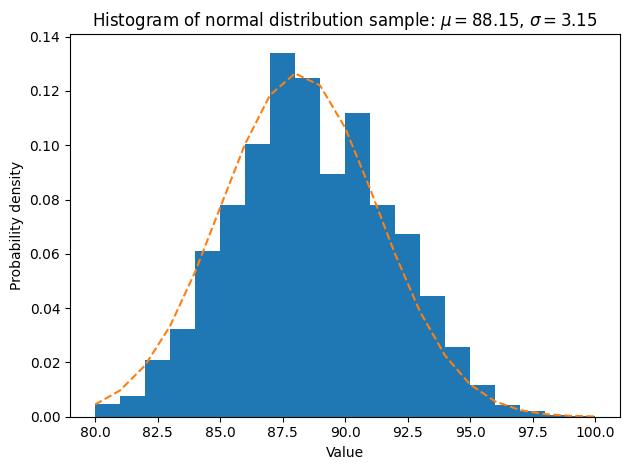

In [9]:
fig, ax = plt.subplots()

# example data
points = df.points.values
mean = points.mean()  # mean of distribution
std = np.std(points)  # standard deviation of distribution

n_bins = 20

# the histogram of the data
n, bins, patches = ax.hist(points, n_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * (bins - mean))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of normal distribution sample: '
             fr'$\mu={mean:.2f}$, $\sigma={std:.2f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [10]:
points = df.points.values
polarity = df.polarity_blob.values
subjectivity = df.subjectivity_blob.values

In [11]:
df['polarity_int'] = round(df.polarity_blob * 10, 0)

In [12]:
data = pd.DataFrame(df.points.unique(), columns=['points'])

In [13]:
df.polarity_blob = df.polarity_blob + 1

In [14]:
corr_blob = df[['points', 'price', 'polarity_blob', 'subjectivity_blob']].corr()

In [15]:
corr_blob

,points,price,polarity_blob,subjectivity_blob
points,1.000000,0.437456,0.178145,0.103657
price,0.437456,1.000000,0.005649,0.039635
polarity_blob,0.178145,0.005649,1.000000,0.468119
subjectivity_blob,0.103657,0.039635,0.468119,1.000000


#### Visualizando a correlação das variáveis do TextBlob

<Axes: >

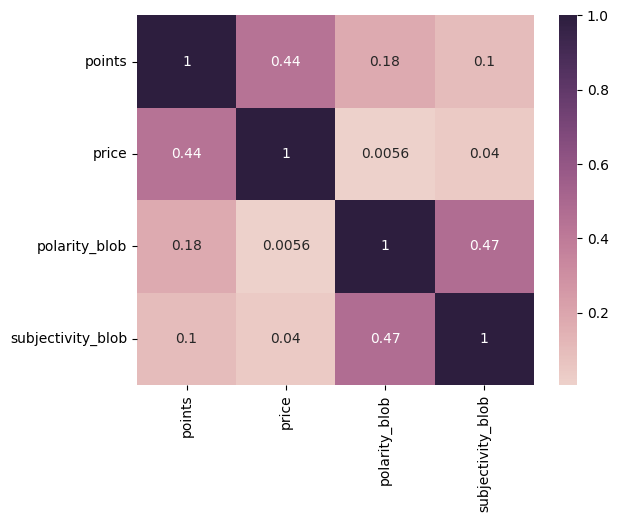

In [16]:
sns.heatmap(corr_blob, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

In [17]:
analyzer = SentimentIntensityAnalyzer()

df['pos_vader'] = df.description.apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['neg_vader'] = df.description.apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['neu_vader'] = df.description.apply(lambda x: analyzer.polarity_scores(x)['neu'])
df['comp_vader'] = df.description.apply(lambda x: analyzer.polarity_scores(x)['compound'])

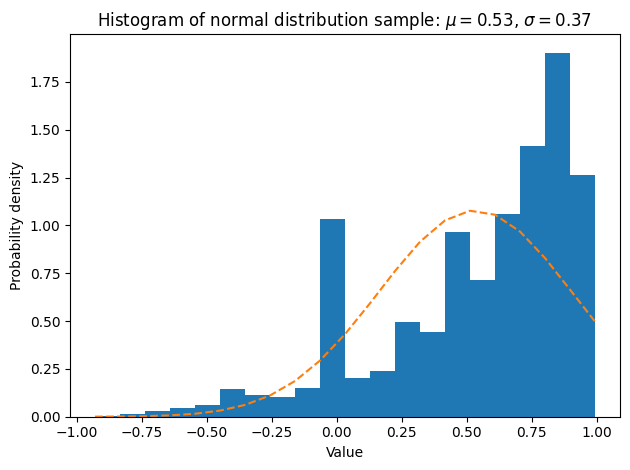

In [18]:
fig, ax = plt.subplots()

# example data
comp = df.comp_vader.values
mean = comp.mean()  # mean of distribution
std = np.std(comp)  # standard deviation of distribution

n_bins = 20

# the histogram of the data
n, bins, patches = ax.hist(comp, n_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * (bins - mean))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of normal distribution sample: '
             fr'$\mu={mean:.2f}$, $\sigma={std:.2f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [19]:
corr_vader = df[['points', 'price', 'pos_vader', 'neg_vader', 'neu_vader', 'comp_vader']].corr()

In [20]:
corr_vader

,points,price,pos_vader,neg_vader,neu_vader,comp_vader
points,1.000000,0.437456,0.173114,-0.202852,-0.103024,0.330897
price,0.437456,1.000000,0.021684,-0.021594,-0.014125,0.079014
pos_vader,0.173114,0.021684,1.000000,-0.190896,-0.938954,0.825172
neg_vader,-0.202852,-0.021594,-0.190896,1.000000,-0.158466,-0.491882
neu_vader,-0.103024,-0.014125,-0.938954,-0.158466,1.000000,-0.657614
comp_vader,0.330897,0.079014,0.825172,-0.491882,-0.657614,1.000000


<Axes: >

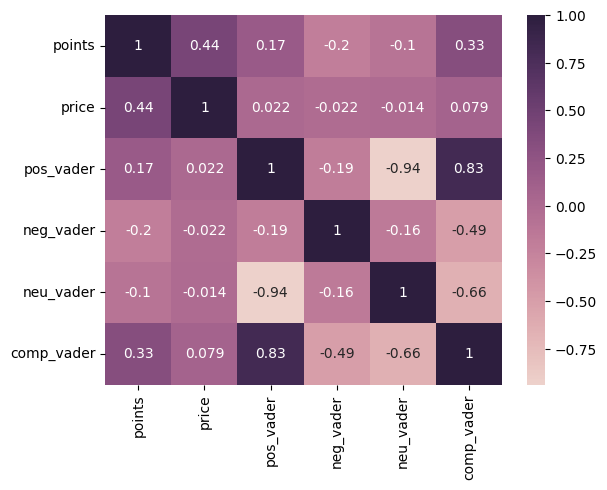

In [21]:
sns.heatmap(corr_vader, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

##### Plotando "Compound" e "Negative" vs "Points", respectivamente

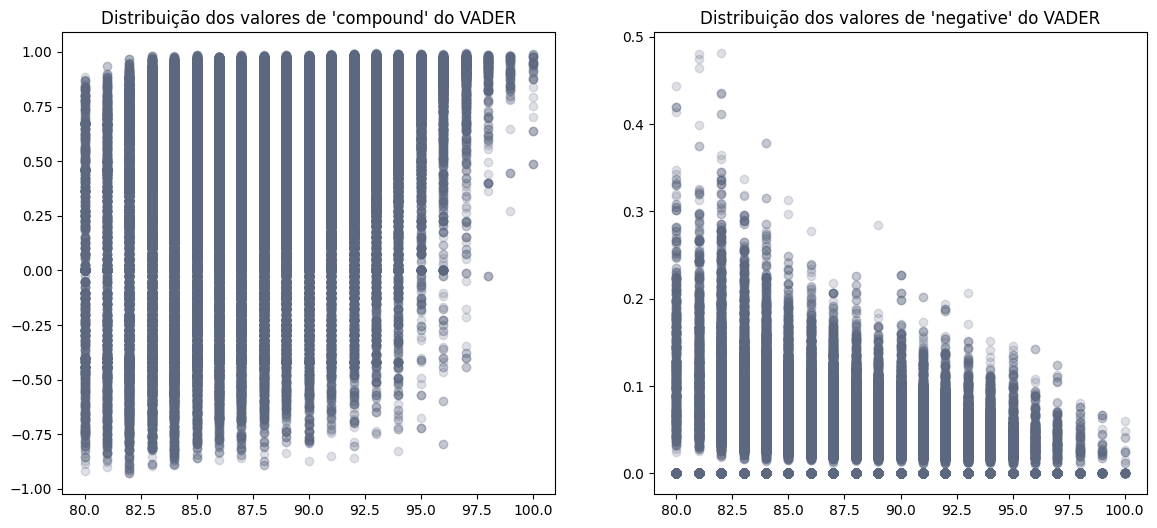

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

points = df.points.values
comp = df.comp_vader.values
neg = df.neg_vader.values

ax[0].scatter(x=points, y=comp, alpha=0.2, c='#5c6780')
ax[1].scatter(x=points, y=neg, alpha=0.2, c='#5c6780')

ax[0].set_title("""Distribuição dos valores de 'compound' do VADER""")
ax[1].set_title("""Distribuição dos valores de 'negative' do VADER""")

plt.show()

Repare que, por mais que o 'compound' apresente uma maior correlação com 'points' o 'negative' apresenta o limite superior inversamente correlacionado.

Talvez a gente consiga extrair alguma coisa disso

##### Plotando a relação entre 'negative' e 'points' em diferentes quartis do 'negative'

21

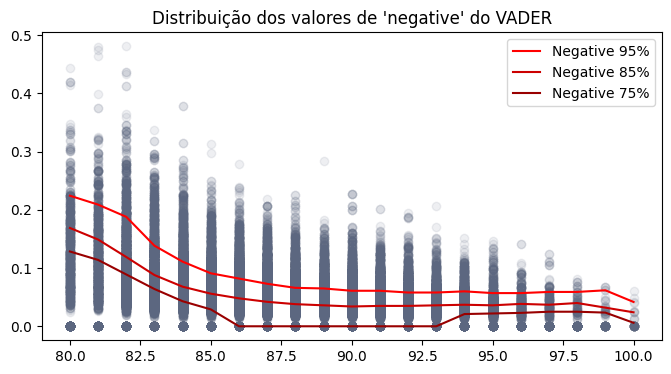

In [23]:
def get_quantile(series, quantile):
    quantile_list = []
    
    for p in range(80, 101):
        n = df.loc[df.points == p, series].quantile(q=quantile, interpolation='linear')
        quantile_list.append(n)
    return quantile_list


fig, ax = plt.subplots(figsize=(8, 4))

x = df.points.sort_values().unique()

neg75 = get_quantile('neg_vader', 0.75)
neg85 = get_quantile('neg_vader', 0.85)
neg95 = get_quantile('neg_vader', 0.95)

ax.plot(x, neg95, label='Negative 95%', c='#ff0000')
ax.plot(x, neg85, label='Negative 85%', c='#cc0000')
ax.plot(x, neg75, label='Negative 75%', c='#990000')

neg = df.neg_vader.values

ax.scatter(x=points, y=neg, alpha=0.1, c='#5c6780')

ax.legend(loc='upper right')

ax.set_title("""Distribuição dos valores de 'negative' do VADER""")

len(x)

Existem MUITOS valores de negative iguais a zero e em todas as categorias

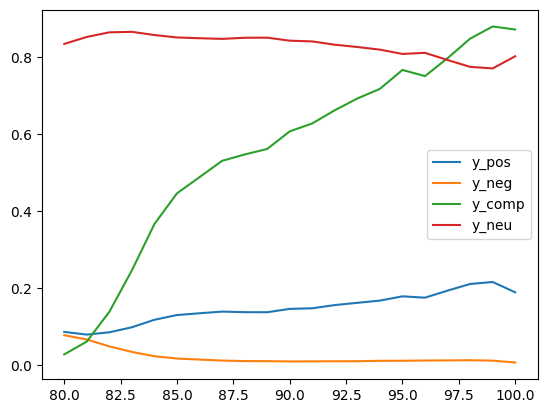

In [45]:
fig, ax = plt.subplots()

vader_means = df.groupby('points')[['comp_vader', 'neg_vader', 'pos_vader', 'neu_vader']].mean()
neg = df.neg_vader.quantile(q=0.75)
vader_means['neg75'] = neg


x = vader_means.index.values
y_comp = vader_means.comp_vader.values
y_neg = vader_means.neg_vader.values
y_pos = vader_means.pos_vader.values
y_neu = vader_means.neu_vader.values

plt.plot(x, y_pos)
plt.plot(x, y_neg)
plt.plot(x, y_comp)
plt.plot(x, y_neu)

plt.legend(labels=['y_pos', 'y_neg', 'y_comp', 'y_neu'])

plt.show()

In [46]:
temp = df[['description', 'comp_vader', 'points']].sample(10)

In [48]:
for i in temp.index:
    print(temp.loc[i, 'description'])
    print(temp.loc[i, 'points'])
    print(temp.loc[i, 'comp_vader'])
    print("")

Over the last few years, veteran winemaker Roman Roth's eponymous Merlot has proven to be a consistent winner. His 2007 vintage is no exception. While intensely ripe with a rich, almost raisined black-fruit character, it's balanced with hints of granite, smoke and brine that all lend a savory, earthy tone. Penetratingly tannic and robust in structure, it's a wine to decant now, or cellar through 2019–2021.
91
0.8225

Classic Nebbiolo aromas of rose petal, aromatic herb, woodland berry, anise and a balsamic note lead the way on this bracing wine. The taut, lean palate offers wild cherry, white pepper, clove and anise alongside assertive tannins and nervous acidity. Drink 2019–2031.
91
-0.2732

Big and boisterous, as if you're sniffing a bed of coal, menthol and macerated black fruit. The palate is sun-drenched and juicy, but not what you'd call elevated. And the finish mixes savory flavors with tight tannins. A good red wine that bears little semblance to Old World Syrah.
86
0.5927

Zes

In [53]:
df['comp_resumo'] = df.comp_vader.apply(lambda x: 1 if x >= 0.5 else 0)

<Axes: xlabel='points', ylabel='Count'>

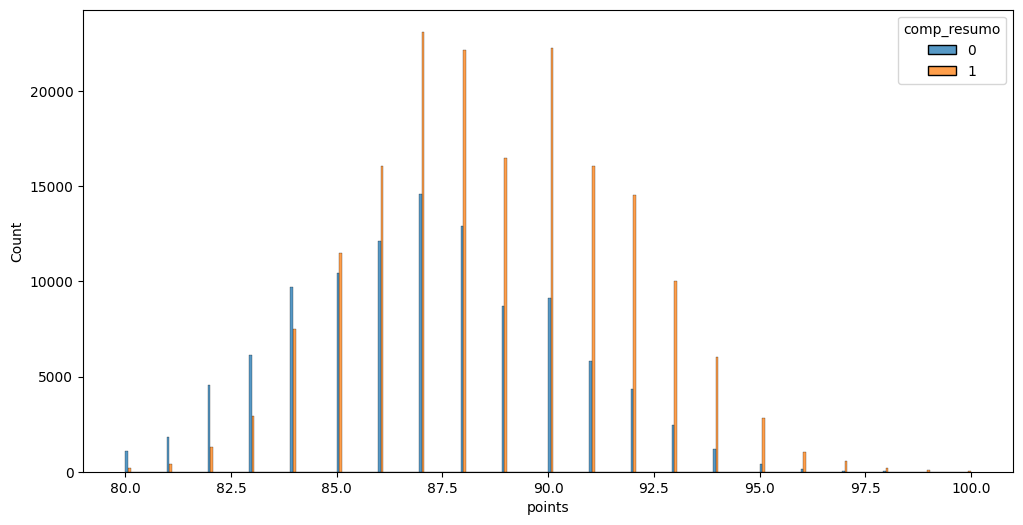

In [58]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='points', hue='comp_resumo', multiple='dodge')

In [60]:
df.comp_vader.describe()

count    280901.000000
mean          0.533276
std           0.370083
min          -0.928800
25%           0.318200
50%           0.648600
75%           0.831600
max           0.993700
Name: comp_vader, dtype: float64